In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# 載DATA / 檢查DATA / 預處理


In [1]:
from tensorflow.keras.datasets import fashion_mnist   #10分類

(x_train_set, y_train_set), (x_test, y_test) = fashion_mnist.load_data()
x_train_set.shape, y_train_set.shape, x_test.shape, y_test. shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [2]:
print(y_train_set[0])
print(x_train_set[0])

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

9


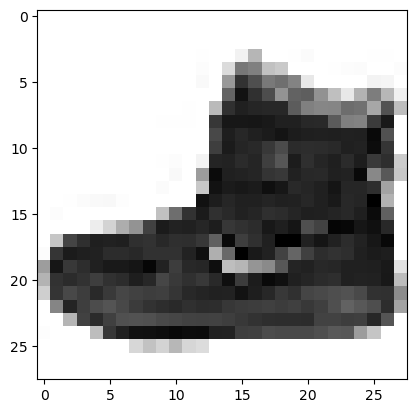

In [8]:
i = 0
print(y_train_set [i])
plt.imshow(x_train_set[i], cmap='binary')   #data經過轉換
plt.show()

In [10]:
# Split data
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train_set, 
                                                      y_train_set, 
                                                      random_state=1)

In [11]:
x_train.shape, x_valid.shape

((45000, 28, 28), (15000, 28, 28))

In [12]:
print(x_train[0])
print("----------------------------------------")
x_train2 = x_train / 255.0
print(x_train2[0])

[[  0   0   0   0   0   0   1   0   0   0   0  63   0   0   0   0   0  22
   10   0   0   0   3   0   0   0   0   0]
 [  0   0   0   1   0   1   0   0   0 113 226 247 216 185 147 146 207 235
  210 136  15   0   0   2   0   0   0   0]
 [  0   0   0   0   2   0   0 138 221 234 222 218 243 255 255 255 255 223
  218 235 223 172   0   0   4   0   0   0]
 [  0   0   0   2   0   0 205 239 215 212 214 206 213 216 220 220 216 213
  218 214 212 239 213   0   0   0   0   0]
 [  0   0   0   0   0 163 236 208 215 216 217 215 215 215 209 212 215 215
  215 219 218 206 234 100   0   0   0   0]
 [  0   0   0   0  47 234 215 215 215 215 214 214 215 214 215 216 216 215
  215 215 217 215 223 232   0   0   0   0]
 [  0   0   0   0 189 231 222 214 214 215 215 215 215 215 214 215 216 216
  216 218 217 218 219 238  78   0   0   0]
 [  0   0   0   0 217 216 229 225 215 216 214 215 215 214 214 215 215 216
  217 218 217 221 225 230 194   0   0   0]
 [  0   0   0 130 235 209 225 233 211 214 216 216 217 216 214 21

In [13]:
# Preprocessing
x_train = x_train / 255.0
x_valid =x_valid / 255.0
x_test = x_test / 255.0
print(x_train.shape, x_valid.shape, x_test.shape)

(45000, 28, 28) (15000, 28, 28) (10000, 28, 28)


# Build model

In [14]:
# Build Model
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Flatten, Dense

In [15]:
keras.backend.clear_session() #----------------->清空暫存
np. random. seed (1)
tf.random.set_seed(1)

## step 1 : model

In [36]:
model = Sequential([
    Flatten(input_shape=x_train.shape[1:]), #--------->預設沒有bias  
    #輸出層：10類別，10個神經元
    Dense (units=10, activation='softmax')   #-------->透過softmax轉出10個神經元
])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## step2 : 設model 參數----->compile

In [38]:
# Compile
model. compile(loss='sparse_categorical_crossentropy', 
               optimizer='sgd', 
               metrics= ['accuracy'])

## step3 : train model

In [39]:
# Train
train = model.fit(x_train, y_train,
                   epochs=20, 
                  validation_data=(x_valid, y_valid))

Epoch 1/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.8739 - accuracy: 0.7254 - val_loss: 0.6807 - val_accuracy: 0.7805
Epoch 2/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.6235 - accuracy: 0.7970 - val_loss: 0.5925 - val_accuracy: 0.8077
Epoch 3/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.5685 - accuracy: 0.8146 - val_loss: 0.5594 - val_accuracy: 0.8139
Epoch 4/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.5383 - accuracy: 0.8235 - val_loss: 0.5314 - val_accuracy: 0.8257
Epoch 5/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.5185 - accuracy: 0.8286 - val_loss: 0.5346 - val_accuracy: 0.8136
Epoch 6/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.5038 - accuracy: 0.8334 - val_loss: 0.5071 - val_accuracy: 0.8293
Epoch 7/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.4922 - accuracy: 0.8351 - val_loss: 0.4953 - val_accuracy:

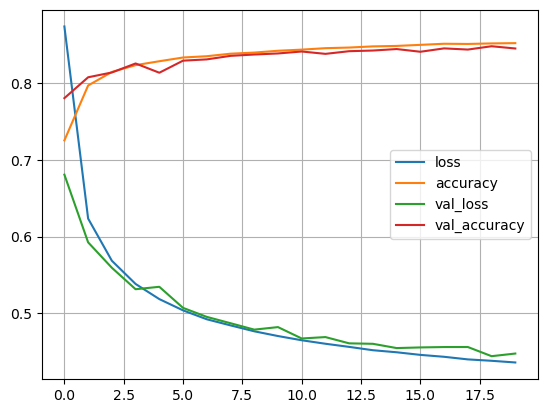

In [40]:
pd.DataFrame(train.history).plot() 
plt.grid(True) 
plt. show()

## step4 : model evaluate / predict

In [41]:
# Evaluate
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4781 - accuracy: 0.8317


[0.47813618183135986, 0.8317000269889832]

In [42]:
# Predict
y_proba = model.predict(x_test)
y_proba[:3].round (2)

313/313 [==============================] - 0s 1ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.13, 0.  , 0.2 , 0.01, 0.65],
       [0.  , 0.  , 0.89, 0.  , 0.01, 0.  , 0.1 , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [43]:
y_pred = np.argmax(y_proba, axis=1)   #找機率最高的index
y_pred[:3]# 預測結果

array([9, 2, 1], dtype=int64)

In [44]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

In [45]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[758   5  11  57   6   0 143   0  20   0]
 [  1 952   3  30   6   0   6   0   2   0]
 [ 15   5 669   9 140   1 146   0  15   0]
 [ 19  13  12 867  25   1  58   0   5   0]
 [  0   2  83  40 741   1 124   0   9   0]
 [  1   0   0   2   0 898   0  61   6  32]
 [113   3 100  38  88   1 623   0  34   0]
 [  0   0   0   0   0  36   0 929   0  35]
 [  1   1   3   9   2   3  26   6 949   0]
 [  0   0   0   0   0  14   1  52   2 931]]
